In [1]:
!pip install fuzzywuzzy
!pip install contractions

In [2]:
import pandas as pd
import numpy as np
import os
import json

import nltk
from nltk.corpus import stopwords
import contractions
from fuzzywuzzy import fuzz

In [3]:
# pd.set_option('display.max_colwidth',-1)

In [4]:
dir = '../input/tmdb-movie-metadata/'
Movies = pd.read_csv(os.path.join(dir,'tmdb_5000_movies.csv'),parse_dates = ['release_date'])
Credits = pd.read_csv(os.path.join(dir,'tmdb_5000_credits.csv'))

In [5]:
def SummaryTable(df):
    print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')
    print("\n","TOP FEW OBSERVATIONS:")
    print(display(df.head(5)))
    print("\n","BOTTOM FEW OBSERVATIONS:")
    print(display(df.tail(5)))
    print("\n","SUMMARY of Quantitative Data:")
    print(display(df.describe()),"\n")
    summary = pd.DataFrame(df.dtypes,columns=['DataType'])
    summary = summary.reset_index()
    summary['VariableName'] = summary['index']
    summary = summary[['VariableName','DataType']]
    summary['Missing'] = df.isnull().sum().values
    summary['MissingPercentage'] = (summary['Missing']/len(df)*100).round(2)
    summary['Uniques'] = df.nunique().values    
    categorical_features = df.select_dtypes(include = np.object)
    print("Frequency of Categorical Data:","\n")
    for i in categorical_features.columns:
        print(i + ":" + str(categorical_features[i].nunique()))
        print(categorical_features[i].value_counts())
        print('\n')
    
    return summary

In [6]:
SummaryTable(Movies)

This dataset has 4803 rows, and 20 columns

 TOP FEW OBSERVATIONS:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


None

 BOTTOM FEW OBSERVATIONS:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


None

 SUMMARY of Quantitative Data:


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


None 

Frequency of Categorical Data: 

genres:1175
[{"id": 18, "name": "Drama"}]                                                                                                                                                370
[{"id": 35, "name": "Comedy"}]                                                                                                                                               282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                              164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                             144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                                                  142
                                                               

Batman                         2
Out of the Blue                2
Kama Sutra - A Tale of Love    1
Left Behind                    1
Flash Gordon                   1
                              ..
God's Not Dead 2               1
Eden Lake                      1
G.I. Joe: Retaliation          1
Wah-Wah                        1
Hide and Seek                  1
Name: original_title, Length: 4801, dtype: int64


overview:4800
Teenage friends must resist the spell of an evil showman staging a house of horrors show in their small town.                                                                                                                                                                                                                                                                                                                                1
A documentary film that highlights two street derived dance styles, Clowing and Krumping, that came out of the low income neighborhoods of L.

,VariableName,DataType,Missing,MissingPercentage,Uniques
0,budget,int64,0,0.00,436
1,genres,object,0,0.00,1175
2,homepage,object,3091,64.36,1691
3,id,int64,0,0.00,4803
4,keywords,object,0,0.00,4222
5,original_language,object,0,0.00,37
6,original_title,object,0,0.00,4801
7,overview,object,3,0.06,4800
8,popularity,float64,0,0.00,4802
9,production_companies,object,0,0.00,3697


In [7]:
# Convert from JSON to Python dictionary
Movies['genres'] = Movies['genres'].apply(json.loads)
Movies['keywords'] = Movies['keywords'].apply(json.loads)
Movies['production_companies'] = Movies['production_companies'].apply(json.loads)
Movies['production_countries'] = Movies['production_countries'].apply(json.loads)
Movies['spoken_languages'] = Movies['spoken_languages'].apply(json.loads)

In [8]:
# Movies.head()

In [9]:
# Extract required key values
Movies['genres'] = Movies['genres'].apply(lambda x: [i["name"] for i in x])
Movies['keywords'] = Movies['keywords'].apply(lambda x: [i["name"] for i in x])
Movies['production_companies'] = Movies['production_companies'].apply(lambda x: [i["name"] for i in x])
Movies['production_countries'] = Movies['production_countries'].apply(lambda x: [i["name"] for i in x])
Movies['spoken_languages'] = Movies['spoken_languages'].apply(lambda x: [i["name"] for i in x])

In [10]:
# If a single name is made of 2 words, they should be combined as combination makes more sense.
Movies['genres'] = Movies['genres'].apply(lambda x: [i.replace(' ','') for i in x])
Movies['keywords'] = Movies['keywords'].apply(lambda x: [i.replace(' ','') for i in x])
Movies['production_companies'] = Movies['production_companies'].apply(lambda x: [i.replace(' ','') for i in x])
Movies['production_countries'] = Movies['production_countries'].apply(lambda x: [i.replace(' ','') for i in x])
Movies['spoken_languages'] = Movies['spoken_languages'].apply(lambda x: [i.replace(' ','') for i in x])

In [11]:
# Remove observations where overview is null
Movies = Movies[pd.notnull(Movies.overview)]

In [12]:
SummaryTable(Credits)

This dataset has 4803 rows, and 4 columns

 TOP FEW OBSERVATIONS:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


None

 BOTTOM FEW OBSERVATIONS:


,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


None

 SUMMARY of Quantitative Data:


,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


None 

Frequency of Categorical Data: 

title:4800
Out of the Blue                    2
The Host                           2
Batman                             2
Divergent                          1
Batman Forever                     1
                                  ..
3:10 to Yuma                       1
All Is Lost                        1
One Flew Over the Cuckoo's Nest    1
Big Momma's House                  1
Hide and Seek                      1
Name: title, Length: 4800, dtype: int64


cast:4761
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

crew:4776
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

,VariableName,DataType,Missing,MissingPercentage,Uniques
0,movie_id,int64,0,0.0,4803
1,title,object,0,0.0,4800
2,cast,object,0,0.0,4761
3,crew,object,0,0.0,4776


In [13]:
# [x["name"] for x in Credits['crew'][0]]
# [x["name"] for x in Credits['crew'][0] if x['job'] == 'Director']
# def get_director(x):
#     for i in x:
#         if i['job'] == 'Director':
#             return i['name']
#     return np.nan

In [14]:
# [x["job"] for x in Credits['crew'][0]]

In [15]:
# Convert from JSON to Python dictionary
Credits['cast'] = Credits['cast'].apply(json.loads)
Credits['crew'] = Credits['crew'].apply(json.loads)

### First 3 elements corresponds to the top 3 important characters in the film. Extract the top 3 actor names
### Crew variable consists of Director, Producer, etc

In [16]:
# One way of extracting Director name
def director_name(y):
    director=[x["name"] for x in y if x['job'] == 'Director']
    return director
# Credits['Director'] = Credits['crew'].apply(director_name)

In [17]:
# Another way of extracting Director name
Credits['Director'] = Credits['crew'].apply(lambda x: [i["name"] for i in x if i['job'] == 'Director'])
# Credits['Director'].isnull().sum()

0

In [18]:
# In a few cases if order =0 or 1 or 2 not present it doesn't extract top 3 cast names
# one way
def cast_names(y):
    cast=[x["name"] for x in y if x['order'] in [0,1,2]]
    return cast
# 2nd way
def cast_names(y):
    cast=[x["name"] for x in y][:3]
    return cast
# Credits['cast'].apply(cast_names)

In [19]:
# Another way to Extract first 3 cast names
Credits['Actors'] = Credits['cast'].apply(lambda x: [i["name"] for i in x][:3])

In [20]:
# If a single name is made of 2 words, they should be combined as combination makes more sense.
Credits['Director'] = Credits['Director'].apply(lambda x: [i.replace(' ','') for i in x])
Credits['Actors'] = Credits['Actors'].apply(lambda x: [i.replace(' ','') for i in x])

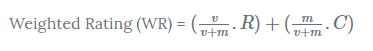
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

In [21]:
# Average of all the votes in the table
C = Movies['vote_average'].mean()
# Minimum number of votes can be set using Percentile=0.25
m = Movies['vote_count'].quantile(0.25)

In [22]:
# Weighted Rating of a movie is calculated from Vote count and Vote average
Movies['Weighted_Rating'] = (((Movies['vote_count'])/((Movies['vote_count'])+m))*(Movies['vote_average']))+((m/((Movies['vote_count'])+m))*C)

In [23]:
# Join Movies and Credits data
Movies = Movies.merge(Credits[['movie_id','Director','Actors']], left_on='id', right_on='movie_id', how='left')

# Content Based Filtering
Recommendations are made based on the content of the movie.Other movies that are similar to the movie are identified and recommended

In [24]:
# Concatenate Movie Attribute
# Initialize a string to convert list to string
# https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/
def Movie_Attribues(x):
    return ' '.join(x['genres']) +' ' +' '.join(x['keywords'])+' ' +' '.join(x['production_companies'])+' ' +' '.join(x['spoken_languages'])+' ' +' '.join(x['Director'])+' ' +' '.join(x['Actors'])

In [25]:
Movies['Movie_Attribues'] = Movies.apply(Movie_Attribues, axis=1)+" " +Movies['tagline'].astype(str)

In [26]:
stop_words = set(stopwords.words('english'))

# Pre-process Movie_Attribues
Movies["Movie_Attribues"] = Movies["Movie_Attribues"].str.lower()
Movies["Movie_Attribues"] = Movies["Movie_Attribues"].str.replace(r'[^a-zA-Z0-9\s]', "")
Movies["Movie_Attribues"] = Movies["Movie_Attribues"].apply(lambda x: x.strip())
Movies["Movie_Attribues"] = Movies["Movie_Attribues"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
Movies["Movie_Attribues"] = Movies["Movie_Attribues"].apply(lambda x: contractions.fix(x))

In [27]:
# Create Bag of words from Movie_Attribues
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
MovieAttributes_CountVectorizer = vectorizer.fit_transform(Movies.Movie_Attribues.values)
MovieAttributes_CountVectorizer = pd.DataFrame(MovieAttributes_CountVectorizer.A, columns=vectorizer.get_feature_names())

In [28]:
# Pre-process overview
Movies["overview"] = Movies["overview"].str.replace(r'[^a-zA-Z0-9\s]', "")
Movies["overview"] = Movies["overview"].str.lower()
Movies["overview"] = Movies["overview"].str.replace(r'\d+', "")
Movies["overview"] = Movies["overview"].apply(lambda x: x.strip())
Movies["overview"] = Movies["overview"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
Movies["overview"] = Movies["overview"].apply(lambda x: contractions.fix(x))

In [29]:
# Create tf-idf vectors
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_vectorizer = TfidfVectorizer()
MovieOverview_TFIDF = TFIDF_vectorizer.fit_transform(Movies.overview.values)
MovieOverview_TFIDF = pd.DataFrame(MovieOverview_TFIDF.A, columns=TFIDF_vectorizer.get_feature_names())

In [30]:
# Combine 2 DataFrames
Movie_VectorMatrices = pd.concat([MovieAttributes_CountVectorizer, MovieOverview_TFIDF], axis = 1)
Movie_VectorMatrices = Movie_VectorMatrices.to_numpy()

In [31]:
print(MovieAttributes_CountVectorizer.shape)
print(MovieOverview_TFIDF.shape)

(4800, 25866)
(4800, 22987)


In [32]:
from sklearn.metrics.pairwise import cosine_similarity
# Cosine Similarity is calculated on Bag of words matrix
Movie_VectorMatrices_CosineSim = cosine_similarity(Movie_VectorMatrices)
Movie_VectorMatrices_CosineSim = pd.DataFrame(Movie_VectorMatrices_CosineSim)
Movie_VectorMatrices_CosineSim.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,1.000000,0.164771,0.125615,0.053319,0.234328,0.144686,0.054924,0.164599,0.102418,0.116941,...,0.000000,0.046225,0.035950,0.066662,0.000000,0.061633,0.040032,0.073472,0.053376,0.037743
1,0.164771,1.000000,0.135138,0.056388,0.188828,0.184812,0.117647,0.140028,0.146254,0.156556,...,0.000000,0.049507,0.037670,0.035007,0.000000,0.033005,0.000000,0.040137,0.057166,0.040423
2,0.125615,0.135138,1.000000,0.096724,0.143223,0.211341,0.067267,0.161322,0.084629,0.107417,...,0.079520,0.056614,0.042796,0.040032,0.001453,0.150970,0.000000,0.045640,0.065372,0.046225
3,0.053319,0.056388,0.096724,1.000000,0.060347,0.088581,0.028584,0.101593,0.070838,0.242795,...,0.032880,0.094916,0.071750,0.100673,0.067116,0.094916,0.000000,0.076741,0.056146,0.039607
4,0.234328,0.188828,0.143223,0.060347,1.000000,0.098374,0.126418,0.187674,0.077850,0.100222,...,0.000459,0.052705,0.040136,0.074536,0.000000,0.035136,0.000000,0.042144,0.060858,0.043754


In [33]:
# Remove Titles in the recommendations that are sequels or prequels by using fuzzywuzzy package
# remove_sequels() function defines the degree of similarity of two film titles and if too close, the most recent film is removed from the list of recommendations.

In [36]:
def movie_recommender(movie_title):
    movies_list = Movies['title'].values
    movie_idx=np.where(movies_list == movie_title)[0][0]
    movie_similarities = Movie_VectorMatrices_CosineSim.iloc[movie_idx].values
    similar_movie_idxs = np.argsort(-movie_similarities)[1:]
    RecommendedMoviesOrder = movies_list[similar_movie_idxs]
    # Remove sequels or prequels
    NewRecommendedMovies = []
    for x in RecommendedMoviesOrder: 
        if fuzz.ratio(MovieTitle,x)<50 or fuzz.token_set_ratio(MovieTitle,x)<50:
            NewRecommendedMovies.append(x)
        else:
            NewRecommendedMovies
    return(NewRecommendedMovies[0:5])

In [37]:
MovieTitle="Interstellar"
print("Movie:",MovieTitle)
print("Top 5 recommended movies:",movie_recommender(MovieTitle))

Movie: Interstellar
Top 5 recommended movies: ['Space Cowboys', 'Silent Running', '2001: A Space Odyssey', 'The Martian', 'Apollo 13']
